In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/trendyol/code

/content/drive/MyDrive/trendyol/code


In [5]:
transactions=pd.read_csv("last_transaction.csv")

In [6]:
transactions.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,discount_ratio,user_total_return,user_total_transaction,user_return_ratio,brand_total_return,brand_total_sel,brand_return_rate,category__total_return,category_total_transaction,category_return_rate
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,0.6504,3.0,24,0.125000,430.0,3595,0.119611,176783.0,2420066,0.073049
1,2021-07-30 18:58:00.932000+00:00,1197522,1,4662,1106188515,721077393,95503167,159147197,79.90,49.90,...,0.6250,6.0,52,0.115385,430.0,3595,0.119611,176783.0,2420066,0.073049
2,2021-06-09 19:44:28.677000+00:00,10351401,1,4662,1006664760,654423557,95503167,159147197,79.90,59.90,...,0.7500,1.0,21,0.047619,430.0,3595,0.119611,176783.0,2420066,0.073049
3,2021-06-09 19:44:28.677000+00:00,10351401,1,115370,1006664759,654423557,94557827,157649187,74.90,74.90,...,1.0000,1.0,21,0.047619,430.0,3595,0.119611,176783.0,2420066,0.073049
4,2021-06-02 22:55:32.304000+00:00,13247129,1,4662,990858398,645461482,79864510,135447257,52.12,29.95,...,0.5747,22.0,2058,0.010690,430.0,3595,0.119611,176783.0,2420066,0.073049


In [9]:
brannd_return=transactions.groupby(["brand_name"])["is_returned"].agg(['sum','count']).sort_values(by="sum",ascending=False).reset_index()
brannd_return[:10]

,brand_name,sum,count
0,TRENDYOLMİLLA,600521.0,3231267
1,TRENDYOL MAN,63007.0,685224
2,DeFacto,54631.0,730981
3,Koton,42883.0,429637
4,Happiness İst.,31489.0,292316
5,Penti,27609.0,422846
6,Olalook,21724.0,190608
7,Mavi,20534.0,193635
8,Addax,19156.0,179315
9,Trend Alaçatı Stili,17606.0,135444


In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

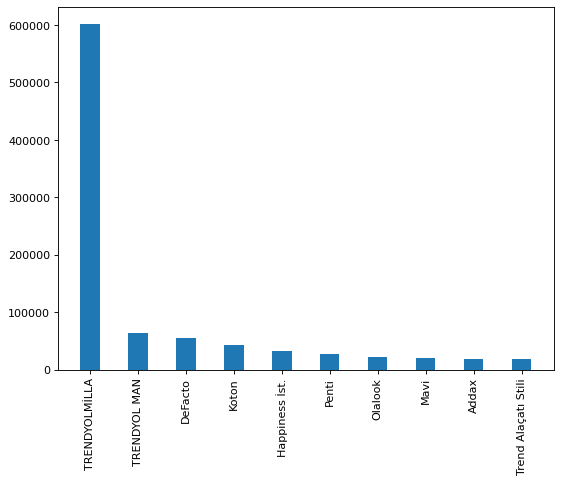

In [24]:
figure(figsize=(8, 6), dpi=80)
plt.bar(brannd_return["brand_name"][:10], brannd_return["sum"][:10],
        width = 0.4)
plt.xticks(rotation=90)

In [21]:
category_return_rate=transactions.groupby(["category_name"])["is_returned"].agg(['sum','count']).sort_values(by="sum",ascending=False).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

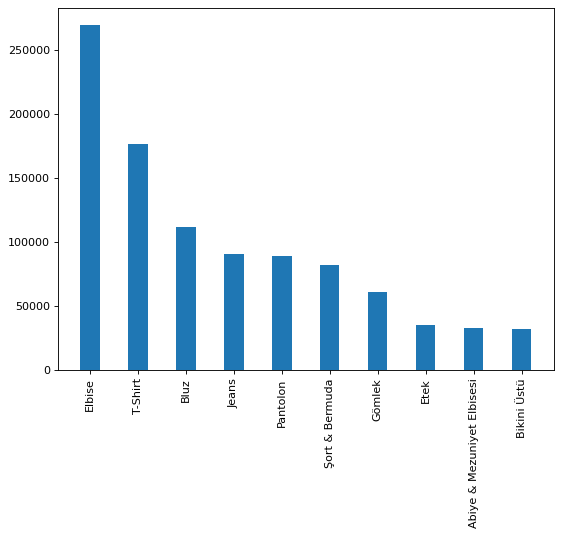

In [23]:
figure(figsize=(8, 6), dpi=80)
plt.bar(category_return_rate["category_name"][:10], category_return_rate["sum"][:10], 
        width = 0.4)
plt.xticks(rotation=90) 

In [7]:
transactions.columns

Index(['order_date', 'user_id', 'is_elite_user', 'supplier_id',
       'order_line_item_id', 'order_parent_id', 'product_content_id',
       'product_variant_id', 'original_price', 'discounted_price', 'coupon_id',
       'coupon_discount', 'promotion_name', 'promotion_award_value',
       'is_wallet_trx', 'is_saved_card_trx', 'is_returned', 'gender',
       'member_year', 'brand_name', 'category_name', 'category_name.1',
       'brand_id', 'category_id', 'discount_ratio', 'user_total_return',
       'user_total_transaction', 'user_return_ratio', 'brand_total_return',
       'brand_total_sel', 'brand_return_rate', 'category__total_return',
       'category_total_transaction', 'category_return_rate'],
      dtype='object')

In [ ]:
supplier_return = pd.read_csv("../data/supplier_return.csv")
supplier_return

,supplier_id,returnRate
0,247019,0.000000
1,264022,0.000000
2,165838,0.000000
3,294046,0.000000
4,185253,0.000000
...,...,...
22531,108994,0.097232
22532,235265,0.096283
22533,115175,0.026504
22534,335515,0.068950


In [ ]:
transactions = transactions.merge(supplier_return, on="supplier_id")


In [ ]:
supplier_disputed_return = pd.read_csv("../data/supplier_disputed_return.csv")
supplier_disputed_return

,supplier_id,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage
0,344,164,0,0,0.000000
1,263495,332,0,0,0.000000
2,193158,670,1,0,0.000000
3,146855,86,0,0,0.000000
4,225296,43,0,0,0.000000
...,...,...,...,...,...
20883,225393,37,3,2,0.666667
20884,337455,37,3,2,0.666667
20885,231111,37,6,4,0.666667
20886,290530,37,5,4,0.800000


In [ ]:
transactions = transactions.merge(supplier_disputed_return, on="supplier_id")
transactions.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,brand_total_sel,brand_return_rate,category__total_return,category_total_transaction,category_return_rate,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,3595,0.119611,176783.0,2420066,0.073049,0.098178,16357,76,25,0.328947
1,2021-07-30 18:58:00.932000+00:00,1197522,1,4662,1106188515,721077393,95503167,159147197,79.90,49.90,...,3595,0.119611,176783.0,2420066,0.073049,0.098178,16357,76,25,0.328947
2,2021-06-09 19:44:28.677000+00:00,10351401,1,4662,1006664760,654423557,95503167,159147197,79.90,59.90,...,3595,0.119611,176783.0,2420066,0.073049,0.098178,16357,76,25,0.328947
3,2021-06-02 22:55:32.304000+00:00,13247129,1,4662,990858398,645461482,79864510,135447257,52.12,29.95,...,3595,0.119611,176783.0,2420066,0.073049,0.098178,16357,76,25,0.328947
4,2021-06-02 22:55:32.304000+00:00,13247129,1,4662,990858400,645461482,81844210,138399744,52.12,29.95,...,3595,0.119611,176783.0,2420066,0.073049,0.098178,16357,76,25,0.328947


In [ ]:
transactions.to_csv("really_last_data.csv",index=False)

In [ ]:
transactions.tail()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,brand_total_sel,brand_return_rate,category__total_return,category_total_transaction,category_return_rate,returnRate,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage
11190457,2021-07-14 11:52:08.145000+00:00,12731850,1,277032,1080163092,705801289,69037392,119641971,3500.0,2500.0,...,2,0.000000,35.0,136,0.257353,0.000000,1,1,0,0.0
11190458,2021-05-30 19:11:22.389000+00:00,3066419,1,188283,981787415,640281742,85949938,143897068,4000.0,1999.0,...,1,1.000000,35.0,136,0.257353,0.222222,14,1,0,0.0
11190459,2021-06-03 20:40:34.237000+00:00,10270396,1,153786,993310587,646823373,39752781,70389850,3150.0,1890.0,...,1,0.000000,35.0,136,0.257353,0.083333,1,0,0,0.0
11190460,2021-06-09 17:28:47.968000+00:00,12378000,1,169829,1006365358,654266468,75236961,128916385,11500.0,6950.0,...,1,0.000000,35.0,136,0.257353,0.151515,26,1,1,1.0
11190461,2021-08-02 21:39:10.689000+00:00,4032657,0,398475,1111326622,724122105,111657832,181813511,63.2,50.3,...,35,0.171429,1.0,9,0.111111,0.021277,2,0,0,0.0


In [ ]:
transactions["brand_return_rate"].fillna(transactions["brand_return_rate"].mean(),inplace=True)
transactions[["order_date"]] = transactions[["order_date"]].apply(pd.to_datetime)
submission=transactions[transactions.order_date >= "2021-08-01"]
transactions.drop(transactions[transactions.order_date >= "2021-08-01"].index,inplace=True)
submission.sort_values(by="order_date",inplace=True)
submission.reset_index(inplace=True)
submission.drop("index",inplace=True,axis=1)
submission.tail()
transactions.drop(["order_date",'user_id','supplier_id',
       'order_line_item_id','order_parent_id', 'product_content_id',
       'product_variant_id','discounted_price', 'coupon_id',
       'coupon_discount', 'promotion_name', 'promotion_award_value','brand_name', 'category_name', 'category_name.1',
       'brand_id', 'category_id'
       ],axis=1,inplace=True)

X=transactions.drop("is_returned",axis=1)
y=transactions["is_returned"]



/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier, plot_importance

In [ ]:

X=transactions.drop("is_returned",axis=1)
y=transactions["is_returned"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
model = LGBMClassifier(random_state=0)
model.fit(X_train, y_train)

In [ ]:
preds = model.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
plot_importance(model)

In [ ]:
brannd_return=transactions.groupby(["brand_name"])["is_returned"].agg(['sum','count']).sort_values(by="sum",ascending=False).reset_index()
brannd_return["brand_return_rate"]=brannd_return["sum"]/brannd_return["count"]
brannd_return.rename(columns={'sum': 'brand_total_return', 'count': 'brand_total_sel'},inplace=True)
brannd_return.sort_values(by="brand_return_rate",ascending=False).head(20)

,brand_name,brand_total_return,brand_total_sel,brand_return_rate
8773,Simple Favor,1.0,1,1.0
9440,Seleste,1.0,1,1.0
9463,Uğur Şapka,1.0,1,1.0
9458,Makbush,1.0,1,1.0
9457,Madame Suzi,1.0,1,1.0
9447,New Power,1.0,1,1.0
6709,borcka,2.0,2,1.0
11198,La Grazia,1.0,1,1.0
6725,nish for you,2.0,2,1.0
9347,PinkPony,1.0,1,1.0


In [ ]:
transactions.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,is_saved_card_trx,is_returned,gender,member_year,brand_name,category_name,category_name.1,brand_id,category_id,discount_ratio
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.9,51.94,...,1.0,0.0,1,2011,Slazenger,T-Shirt,T-Shirt,682,604,0.6504
1,2021-07-30 18:58:00.932000+00:00,1197522,1,4662,1106188515,721077393,95503167,159147197,79.9,49.90,...,0.0,0.0,1,2010,Slazenger,T-Shirt,T-Shirt,682,604,0.6250
2,2021-06-09 19:44:28.677000+00:00,10351401,1,4662,1006664760,654423557,95503167,159147197,79.9,59.90,...,0.0,0.0,1,2014,Slazenger,T-Shirt,T-Shirt,682,604,0.7500
3,2021-05-01 00:00:01.761000+00:00,3941815,0,163,901280149,595758968,36313798,64622938,130.0,59.97,...,1.0,0.0,1,2011,Pierre Cardin,T-Shirt,T-Shirt,121,604,0.4612
4,2021-05-01 00:52:38.360000+00:00,26248185,0,163,901437292,595844343,36313798,64622938,130.0,59.97,...,1.0,0.0,0,2019,Pierre Cardin,T-Shirt,T-Shirt,121,604,0.4612


In [ ]:
user_return=transactions.groupby(["user_id"])["is_returned"].agg(['sum','count']).sort_values(by="sum",ascending=False).reset_index()
user_return["user_return_ratio"]=user_return["sum"]/user_return["count"]
user_return.rename(columns={'sum': 'user_total_return', 'count': 'user_total_transaction'},inplace=True)
user_return.sort_values(by="user_return_ratio",ascending=False).head(20)

,user_id,user_total_return,user_total_transaction,user_return_ratio
237039,31791276,1.0,1,1.0
258356,33394538,1.0,1,1.0
234457,41456718,1.0,1,1.0
196197,11402682,2.0,2,1.0
196232,54437805,2.0,2,1.0
159506,44009805,2.0,2,1.0
299420,28581010,1.0,1,1.0
258320,3777257,1.0,1,1.0
113477,4754474,3.0,3,1.0
196268,54358425,2.0,2,1.0


In [ ]:
transactions = transactions.merge(user_return, on="user_id")
transactions.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,member_year,brand_name,category_name,category_name.1,brand_id,category_id,discount_ratio,user_total_return,user_total_transaction,user_return_ratio
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,2011,Slazenger,T-Shirt,T-Shirt,682,604,0.6504,3.0,24,0.125
1,2021-05-01 00:00:01.761000+00:00,3941815,0,163,901280149,595758968,36313798,64622938,130.00,59.97,...,2011,Pierre Cardin,T-Shirt,T-Shirt,121,604,0.4612,3.0,24,0.125
2,2021-05-01 00:00:01.761000+00:00,3941815,0,157306,901280145,595758968,36888320,65612791,60.00,50.00,...,2011,Ltb,Polo Yaka T-shirt,Polo Yaka T-shirt,381,2949,0.8335,3.0,24,0.125
3,2021-05-01 00:00:01.761000+00:00,3941815,0,163856,901280144,595758968,36888399,65613254,60.56,49.90,...,2011,Ltb,Polo Yaka T-shirt,Polo Yaka T-shirt,381,2949,0.8240,3.0,24,0.125
4,2021-05-19 13:08:20.950000+00:00,3941815,0,4442,956142381,625916310,73655340,126823590,89.94,53.97,...,2011,Penti,Sütyen,Sütyen,8605,567,0.6000,3.0,24,0.125


In [ ]:
transactions = transactions.merge(brannd_return, on="brand_name")
transactions.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,category_name.1,brand_id,category_id,discount_ratio,user_total_return,user_total_transaction,user_return_ratio,brand_total_return,brand_total_sel,brand_return_rate
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,T-Shirt,682,604,0.6504,3.0,24,0.125000,430.0,3595,0.119611
1,2021-07-30 18:58:00.932000+00:00,1197522,1,4662,1106188515,721077393,95503167,159147197,79.90,49.90,...,T-Shirt,682,604,0.6250,6.0,52,0.115385,430.0,3595,0.119611
2,2021-06-09 19:44:28.677000+00:00,10351401,1,4662,1006664760,654423557,95503167,159147197,79.90,59.90,...,T-Shirt,682,604,0.7500,1.0,21,0.047619,430.0,3595,0.119611
3,2021-06-09 19:44:28.677000+00:00,10351401,1,115370,1006664759,654423557,94557827,157649187,74.90,74.90,...,T-Shirt,682,604,1.0000,1.0,21,0.047619,430.0,3595,0.119611
4,2021-06-02 22:55:32.304000+00:00,13247129,1,4662,990858398,645461482,79864510,135447257,52.12,29.95,...,T-Shirt,682,604,0.5747,22.0,2058,0.010690,430.0,3595,0.119611


In [ ]:
category_return_rate=transactions.groupby(["category_name"])["is_returned"].agg(['sum','count']).sort_values(by="sum",ascending=False).reset_index()
category_return_rate["category_return_rate"]=category_return_rate["sum"]/category_return_rate["count"]
category_return_rate.rename(columns={'sum': 'category__total_return', 'count': 'category_total_transaction'},inplace=True)
category_return_rate.sort_values(by="category_return_rate",ascending=False).head(20)

,category_name,category__total_return,category_total_transaction,category_return_rate
175,Tesettür Parka,3.0,6,0.500000
182,Diyabetik Çorap,1.0,2,0.500000
179,Tesettür Mezuniyet Elbisesi,2.0,4,0.500000
8,Abiye & Mezuniyet Elbisesi,33360.0,77411,0.430947
43,Büyük Beden Abiye Elbise,1910.0,4883,0.391153
123,Büyük Beden Abiye Takım,91.0,239,0.380753
135,Smokin,43.0,115,0.373913
153,Hamile Abiye,20.0,54,0.370370
58,Tesettür Abiye,1132.0,3158,0.358455
130,Büyük Beden Trençkot,54.0,160,0.337500


In [ ]:
transactions = transactions.merge(category_return_rate, on="category_name")
transactions.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,discount_ratio,user_total_return,user_total_transaction,user_return_ratio,brand_total_return,brand_total_sel,brand_return_rate,category__total_return,category_total_transaction,category_return_rate
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.90,51.94,...,0.6504,3.0,24,0.125000,430.0,3595,0.119611,176783.0,2420066,0.073049
1,2021-07-30 18:58:00.932000+00:00,1197522,1,4662,1106188515,721077393,95503167,159147197,79.90,49.90,...,0.6250,6.0,52,0.115385,430.0,3595,0.119611,176783.0,2420066,0.073049
2,2021-06-09 19:44:28.677000+00:00,10351401,1,4662,1006664760,654423557,95503167,159147197,79.90,59.90,...,0.7500,1.0,21,0.047619,430.0,3595,0.119611,176783.0,2420066,0.073049
3,2021-06-09 19:44:28.677000+00:00,10351401,1,115370,1006664759,654423557,94557827,157649187,74.90,74.90,...,1.0000,1.0,21,0.047619,430.0,3595,0.119611,176783.0,2420066,0.073049
4,2021-06-02 22:55:32.304000+00:00,13247129,1,4662,990858398,645461482,79864510,135447257,52.12,29.95,...,0.5747,22.0,2058,0.010690,430.0,3595,0.119611,176783.0,2420066,0.073049


In [ ]:
user_return.reset_index

,sum,count,ratio
user_id,,,
51184114,1463.0,36242,0.040368
10781541,583.0,590,0.988136
51018254,398.0,400,0.995000
29350748,364.0,406,0.896552
51294911,322.0,1734,0.185698
...,...,...,...
20000982,0.0,15,0.000000
20000914,0.0,4,0.000000
20000734,0.0,7,0.000000


In [ ]:
transactions.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,is_saved_card_trx,is_returned,gender,member_year,brand_name,category_name,category_name.1,brand_id,category_id,discount_ratio
0,2021-05-01 00:00:01.761000+00:00,3941815,0,4662,901280147,595758968,95503167,159147197,79.9,51.94,...,1.0,0.0,1,2011,Slazenger,T-Shirt,T-Shirt,682,604,0.6504
1,2021-07-30 18:58:00.932000+00:00,1197522,1,4662,1106188515,721077393,95503167,159147197,79.9,49.90,...,0.0,0.0,1,2010,Slazenger,T-Shirt,T-Shirt,682,604,0.6250
2,2021-06-09 19:44:28.677000+00:00,10351401,1,4662,1006664760,654423557,95503167,159147197,79.9,59.90,...,0.0,0.0,1,2014,Slazenger,T-Shirt,T-Shirt,682,604,0.7500
3,2021-05-01 00:00:01.761000+00:00,3941815,0,163,901280149,595758968,36313798,64622938,130.0,59.97,...,1.0,0.0,1,2011,Pierre Cardin,T-Shirt,T-Shirt,121,604,0.4612
4,2021-05-01 00:52:38.360000+00:00,26248185,0,163,901437292,595844343,36313798,64622938,130.0,59.97,...,1.0,0.0,0,2019,Pierre Cardin,T-Shirt,T-Shirt,121,604,0.4612


In [ ]:
transactions.columns

Index(['order_date', 'user_id', 'is_elite_user', 'supplier_id',
       'order_line_item_id', 'order_parent_id', 'product_content_id',
       'product_variant_id', 'original_price', 'discounted_price', 'coupon_id',
       'coupon_discount', 'promotion_name', 'promotion_award_value',
       'is_wallet_trx', 'is_saved_card_trx', 'is_returned', 'gender',
       'member_year', 'brand_name', 'category_name', 'category_name.1',
       'brand_id', 'category_id', 'discount_ratio', 'user_total_return',
       'user_total_transaction', 'user_return_ratio', 'brand_total_return',
       'brand_total_sel', 'brand_return_rate', 'category__total_return',
       'category_total_transaction', 'category_return_rate'],
      dtype='object')

In [ ]:
transactions[["order_date"]] = transactions[["order_date"]].apply(pd.to_datetime)

In [ ]:
transactions["brand_return_rate"].fillna(transactions["brand_return_rate"].mean(),inplace=True)

In [ ]:
transactions.columns

Index(['order_date', 'user_id', 'is_elite_user', 'supplier_id',
       'order_line_item_id', 'order_parent_id', 'product_content_id',
       'product_variant_id', 'original_price', 'discounted_price', 'coupon_id',
       'coupon_discount', 'promotion_name', 'promotion_award_value',
       'is_wallet_trx', 'is_saved_card_trx', 'is_returned', 'gender',
       'member_year', 'brand_name', 'category_name', 'category_name.1',
       'brand_id', 'category_id', 'discount_ratio', 'user_total_return',
       'user_total_transaction', 'user_return_ratio', 'brand_total_return',
       'brand_total_sel', 'brand_return_rate', 'category__total_return',
       'category_total_transaction', 'category_return_rate'],
      dtype='object')

In [ ]:
submission=transactions[transactions.order_date >= "2021-08-01"]

In [ ]:
transactions.drop(transactions[transactions.order_date >= "2021-08-01"].index,inplace=True)

In [ ]:
transactions.isnull().sum()

order_date                           0
user_id                              0
is_elite_user                        0
supplier_id                          0
order_line_item_id                   0
order_parent_id                      0
product_content_id                   0
product_variant_id                   0
original_price                       0
discounted_price                     0
coupon_id                     10048720
coupon_discount                      0
promotion_name                 5455583
promotion_award_value          5455583
is_wallet_trx                        0
is_saved_card_trx                    0
is_returned                          0
gender                               0
member_year                          0
brand_name                           0
category_name                        0
category_name.1                      0
brand_id                             0
category_id                          0
discount_ratio                       0
user_total_return        

In [ ]:
submission.sort_values(by="order_date",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
submission.reset_index(inplace=True)

In [ ]:
submission.drop("index",inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
submission.tail()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,discount_ratio,user_total_return,user_total_transaction,user_return_ratio,brand_total_return,brand_total_sel,brand_return_rate,category__total_return,category_total_transaction,category_return_rate
421011,2021-08-07 23:59:37.838000+00:00,13825272,1,968,1121265479,729966196,33849681,60695481,130.0,110.50,...,0.8500,21.0,67,0.313433,600521.0,3231267,0.185847,269235.0,1124603,0.239404
421012,2021-08-07 23:59:45.964000+00:00,33168374,0,1188,1121265539,729966282,120921109,194697807,120.0,120.00,...,1.0000,1.0,10,0.100000,54631.0,730981,0.074737,3185.0,43644,0.072977
421013,2021-08-07 23:59:47.991000+00:00,8403167,1,968,1121265912,729966304,79616260,135038018,49.4,31.98,...,0.6475,7.0,84,0.083333,600521.0,3231267,0.185847,16104.0,208502,0.077237
421014,2021-08-07 23:59:52.242000+00:00,7182062,0,150331,1121265644,729966335,37197494,66133988,300.0,300.00,...,1.0000,12.0,24,0.500000,8725.0,45761,0.190665,1376.0,6427,0.214097
421015,2021-08-07 23:59:57.508000+00:00,9362154,0,637,1121266578,729966388,82718402,139666030,80.0,40.00,...,0.5000,2.0,26,0.076923,42883.0,429637,0.099812,2494.0,48371,0.051560


In [ ]:
transactions.drop(['user_id','supplier_id',
       'order_line_item_id','order_parent_id', 'product_content_id',
       'product_variant_id','discounted_price', 'coupon_id',
       'coupon_discount', 'promotion_name', 'promotion_award_value','brand_name', 'category_name', 'category_name.1',
       'brand_id', 'category_id'
       ],axis=1,inplace=True)

In [ ]:
transactions.columns

Index(['order_date', 'is_elite_user', 'original_price', 'is_wallet_trx',
       'is_saved_card_trx', 'is_returned', 'gender', 'member_year',
       'discount_ratio', 'user_total_return', 'user_total_transaction',
       'user_return_ratio', 'brand_total_return', 'brand_total_sel',
       'brand_return_rate', 'category__total_return',
       'category_total_transaction', 'category_return_rate'],
      dtype='object')

AttributeError: ignored

In [ ]:
transactions.drop(["order_date"
       ],axis=1,inplace=True)

In [ ]:
transactions.head()

,order_date,is_elite_user,original_price,is_wallet_trx,is_saved_card_trx,is_returned,gender,member_year,discount_ratio,user_total_return,user_total_transaction,user_return_ratio,brand_total_return,brand_total_sel,brand_return_rate,category__total_return,category_total_transaction,category_return_rate
0,2021-05-01 00:00:01.761000+00:00,0,79.90,0,1.0,0.0,1,2011,0.6504,3.0,24,0.125000,430.0,3595,0.119611,176783.0,2420066,0.073049
1,2021-07-30 18:58:00.932000+00:00,1,79.90,0,0.0,0.0,1,2010,0.6250,6.0,52,0.115385,430.0,3595,0.119611,176783.0,2420066,0.073049
2,2021-06-09 19:44:28.677000+00:00,1,79.90,0,0.0,0.0,1,2014,0.7500,1.0,21,0.047619,430.0,3595,0.119611,176783.0,2420066,0.073049
3,2021-06-09 19:44:28.677000+00:00,1,74.90,0,0.0,0.0,1,2014,1.0000,1.0,21,0.047619,430.0,3595,0.119611,176783.0,2420066,0.073049
4,2021-06-02 22:55:32.304000+00:00,1,52.12,0,1.0,0.0,0,2017,0.5747,22.0,2058,0.010690,430.0,3595,0.119611,176783.0,2420066,0.073049


In [ ]:
transactions[["expected"]].tail()

KeyError: ignored

In [ ]:
transactions.columns

Index(['is_elite_user', 'original_price', 'is_wallet_trx', 'is_saved_card_trx',
       'is_returned', 'gender', 'member_year', 'brand_id', 'category_id',
       'discount_ratio'],
      dtype='object')

In [ ]:
transactions["is_returned"].value_counts()

0.0    9402321
1.0    1370340
Name: is_returned, dtype: int64

In [ ]:
train = transactions[transactions.order_date < "2021-07-24"].sample(frac=0.6, random_state=42)
test = transactions[transactions.order_date >= "2021-07-24"]

In [ ]:
transactions.drop("order_date",axis=1,inplace=True)

In [ ]:
train.drop("order_date",axis=1,inplace=True)
test.drop("order_date",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
del transactions

In [ ]:
transactions.isnull().sum()

order_date                         0
is_elite_user                      0
original_price                     0
is_wallet_trx                      0
is_saved_card_trx                  0
is_returned                   421016
gender                             0
member_year                        0
discount_ratio                     0
user_total_return                  0
user_total_transaction             0
user_return_ratio                  0
brand_total_return                 0
brand_total_sel                    0
brand_return_rate                  0
category__total_return             0
category_total_transaction         0
category_return_rate               0
dtype: int64

In [ ]:

X=transactions.drop("is_returned",axis=1)
y=transactions["is_returned"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
import xgboost as xgb
model_temp=xgb.XGBClassifier()
model_temp.fit(X_train,y_train)

In [ ]:
y_train.value_counts()

0.0    7521856
1.0    1096272
Name: is_returned, dtype: int64

In [ ]:
y_test.value_counts()

0.0    1880465
1.0     274068
Name: is_returned, dtype: int64

In [ ]:
pred = model_temp.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

In [ ]:
del transactions

In [ ]:
X_train[X_train.isnull()]

,is_elite_user,original_price,is_wallet_trx,is_saved_card_trx,gender,member_year,brand_id,category_id,discount_ratio
6454285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3764196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9655120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1332703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4338983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3471365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7704113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:


X_train = train.drop(columns="is_returned", axis=1)
y_train=train["is_returned"]
X_test=test.drop(columns="is_returned", axis=1)
y_test=test["is_returned"]

is_elite_user           0
original_price       5800
is_wallet_trx           0
is_saved_card_trx       0
gender                  0
member_year             0
brand_id                0
category_id             0
discount_ratio       5800
dtype: int64

ValueError: ignored

# train test without date

In [ ]:
df.head()

,is_elite_user,original_price,is_wallet_trx,is_saved_card_trx,is_returned,gender,member_year,brand_id,category_id,discount_ratio
88003,1,65.0,1,0.0,0.0,1,2018,40,529,0.8500
10777237,0,70.0,0,1.0,0.0,1,2019,3268,604,1.0000
5980659,0,100.0,0,0.0,0.0,1,2016,40,563,0.6000
858503,0,100.0,0,1.0,0.0,1,2020,40,1182,0.8000
9348222,1,350.0,0,1.0,0.0,1,2017,362,529,0.3572


In [ ]:
df = transactions.sample(frac=0.6, random_state=42)

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop("is_returned", axis=1),
                                                df["is_returned"], test_size=0.2,
                                                  stratify=df["is_returned"], random_state=0)

#lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier, plot_importance

In [ ]:
model = LGBMClassifier(random_state=0)
model.fit(X_train, y_train)

LGBMClassifier(random_state=0)

In [ ]:
preds = model.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[1832971   47494]
 [ 184353   89715]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94   1880465
         1.0       0.65      0.33      0.44    274068

    accuracy                           0.89   2154533
   macro avg       0.78      0.65      0.69   2154533
weighted avg       0.88      0.89      0.88   2154533



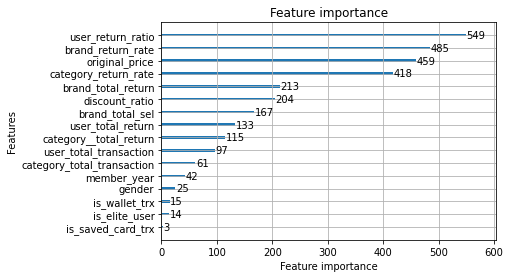

In [ ]:
plot_importance(model)

In [ ]:
submission.head()

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,...,discount_ratio,user_total_return,user_total_transaction,user_return_ratio,brand_total_return,brand_total_sel,brand_return_rate,category__total_return,category_total_transaction,category_return_rate
8,2021-08-05 17:00:09.760000+00:00,13772822,1,4662,1117093793,727441539,79867504,135401881,54.34,34.9,...,0.6420,11.0,68,0.161765,430.0,3595,0.119611,176783.0,2420066,0.073049
9,2021-08-05 17:00:09.760000+00:00,13772822,1,4662,1117093794,727441539,79875708,135449832,54.34,29.9,...,0.5503,11.0,68,0.161765,430.0,3595,0.119611,176783.0,2420066,0.073049
16,2021-08-04 11:30:23.382000+00:00,38475897,0,4662,1114682999,726020103,87055971,145698025,94.90,59.9,...,0.6313,6.0,3387,0.001771,430.0,3595,0.119611,176783.0,2420066,0.073049
17,2021-08-04 11:30:23.382000+00:00,38475897,0,4662,1114683000,726020103,87055837,145697727,94.90,59.9,...,0.6313,6.0,3387,0.001771,430.0,3595,0.119611,176783.0,2420066,0.073049
28,2021-08-02 21:04:58.769000+00:00,18146171,1,4662,1111265808,724084085,79864510,135447257,58.78,31.4,...,0.5340,17.0,696,0.024425,430.0,3595,0.119611,176783.0,2420066,0.073049


In [ ]:
test_preds = model.predict(submission[X_train.columns])

In [ ]:
submission["id"] = submission.apply(lambda x: str(x.user_id) + "|" + str(x.product_content_id) + "|" + str(x.order_parent_id), axis=1)
submission["expected"] = test_preds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
submission = submission.groupby(by=["user_id" , "product_content_id" , "order_parent_id"])["expected"].max().reset_index()

In [ ]:
submission.groupby(by=["user_id" , "product_content_id" , "order_parent_id"])["expected"].max().reset_index()

,user_id,product_content_id,order_parent_id,expected
0,2141,80306720,726403811,0.0
1,2472,74477923,728406577,0.0
2,6888,110023460,726725509,0.0
3,6888,122717581,726725509,0.0
4,6888,126934595,726725509,0.0
...,...,...,...,...
405277,71154882,101265853,722586386,0.0
405278,71160557,37491850,726377172,0.0
405279,71160557,46694896,726377172,1.0
405280,71160557,87073974,726377172,0.0


In [ ]:

submission.head()

,user_id,product_content_id,order_parent_id,expected
0,2141,80306720,726403811,0.0
1,2472,74477923,728406577,0.0
2,6888,110023460,726725509,0.0
3,6888,122717581,726725509,0.0
4,6888,126934595,726725509,0.0


In [ ]:
submission["id"] = submission.apply(lambda x: str(int(x.user_id)) + "|" + str(int(x.product_content_id)) + "|" + str(int(x.order_parent_id)), axis=1)
submission.head()

,user_id,product_content_id,order_parent_id,expected,id
0,2141,80306720,726403811,0.0,2141|80306720|726403811
1,2472,74477923,728406577,0.0,2472|74477923|728406577
2,6888,110023460,726725509,0.0,6888|110023460|726725509
3,6888,122717581,726725509,0.0,6888|122717581|726725509
4,6888,126934595,726725509,0.0,6888|126934595|726725509


In [ ]:
submission.head()

,user_id,product_content_id,order_parent_id,expected,id
0,2141,80306720,726403811,0.0,2141|80306720|726403811
1,2472,74477923,728406577,0.0,2472|74477923|728406577
2,6888,110023460,726725509,0.0,6888|110023460|726725509
3,6888,122717581,726725509,0.0,6888|122717581|726725509
4,6888,126934595,726725509,0.0,6888|126934595|726725509


In [ ]:
submission.tail()

,user_id,product_content_id,order_parent_id,expected,id
405277,71154882,101265853,722586386,0.0,71154882|101265853|722586386
405278,71160557,37491850,726377172,0.0,71160557|37491850|726377172
405279,71160557,46694896,726377172,1.0,71160557|46694896|726377172
405280,71160557,87073974,726377172,0.0,71160557|87073974|726377172
405281,71160557,101181536,726377172,0.0,71160557|101181536|726377172


In [ ]:
submission.dtypes

user_id                 int64
product_content_id      int64
order_parent_id         int64
expected              float64
id                     object
dtype: object

In [ ]:
submission.drop_duplicates(subset=["user_id","product_content_id","order_parent_id"],keep=False).tail()

,user_id,product_content_id,order_parent_id,expected,id
405277,71154882,101265853,722586386,0.0,71154882|101265853|722586386
405278,71160557,37491850,726377172,0.0,71160557|37491850|726377172
405279,71160557,46694896,726377172,1.0,71160557|46694896|726377172
405280,71160557,87073974,726377172,0.0,71160557|87073974|726377172
405281,71160557,101181536,726377172,0.0,71160557|101181536|726377172


In [ ]:
sub=submission[["id", "expected"]]

In [ ]:
submission.tail()

,user_id,product_content_id,order_parent_id,expected,id
405277,71154882,101265853,722586386,0.0,71154882|101265853|722586386
405278,71160557,37491850,726377172,0.0,71160557|37491850|726377172
405279,71160557,46694896,726377172,1.0,71160557|46694896|726377172
405280,71160557,87073974,726377172,0.0,71160557|87073974|726377172
405281,71160557,101181536,726377172,0.0,71160557|101181536|726377172


In [ ]:
sub["expected"]=sub["expected"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sub.drop_duplicates( inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
sub.drop_duplicates(subset=['id'],keep=False).tail()

,id,expected
405277,71154882|101265853|722586386,0
405278,71160557|37491850|726377172,0
405279,71160557|46694896|726377172,1
405280,71160557|87073974|726377172,0
405281,71160557|101181536|726377172,0


In [ ]:
submission.tail()

,user_id,product_content_id,order_parent_id,expected,id
405277,71154882,101265853,722586386,0.0,71154882|101265853|722586386
405278,71160557,37491850,726377172,0.0,71160557|37491850|726377172
405279,71160557,46694896,726377172,1.0,71160557|46694896|726377172
405280,71160557,87073974,726377172,0.0,71160557|87073974|726377172
405281,71160557,101181536,726377172,0.0,71160557|101181536|726377172
